In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

# Initial Setup

In [28]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdf.params={'mass':0.001}
sdf

,x,y,vx,vy,u,h,rho
0,0.00,0.00,0.0,0.0,0.0,0.04,0.999958
1,0.02,0.00,0.0,0.0,0.0,0.04,0.999958
2,0.04,1.00,-0.0,-0.0,0.0,0.04,0.999958
3,0.06,1.00,-0.0,-0.0,0.0,0.04,0.999958
4,0.08,1.00,-0.0,-0.0,0.0,0.04,0.999958
...,...,...,...,...,...,...,...
2495,0.90,0.98,0.0,0.0,0.0,0.04,0.999958
2496,0.92,0.98,0.0,0.0,0.0,0.04,0.999958
2497,0.94,0.98,0.0,0.0,0.0,0.04,0.999958
2498,0.96,0.98,0.0,0.0,0.0,0.04,0.999958


<Axes: xlabel='x', ylabel='y'>

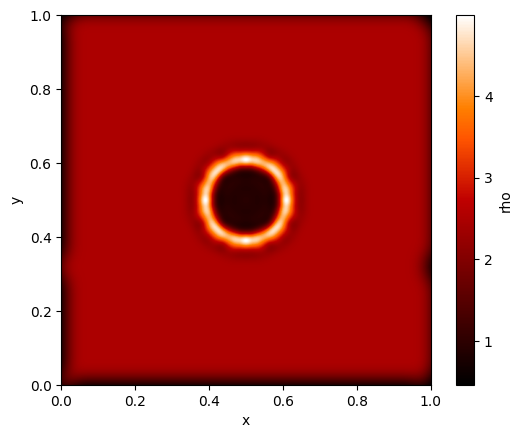

In [29]:
sdf.render('rho', xsec=1.0)

# Final Setup

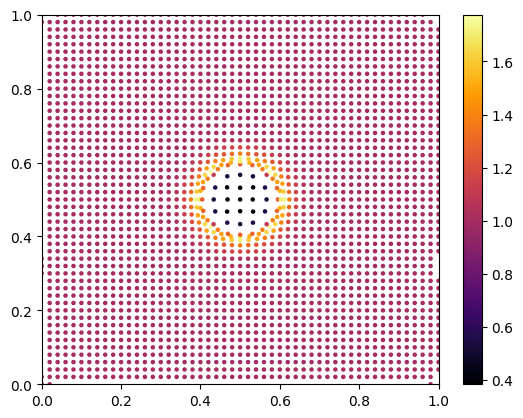

In [32]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

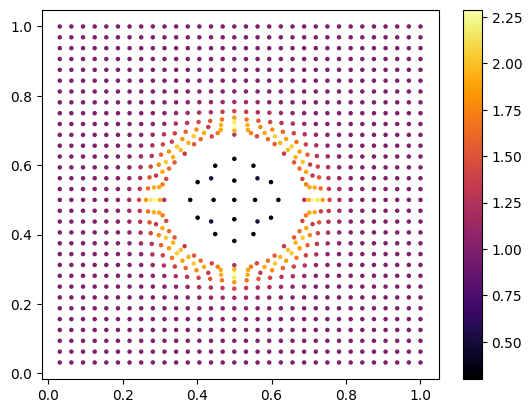

In [14]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.show()

# Angular Momentum's Conservation

In [6]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [7]:
T = 4
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

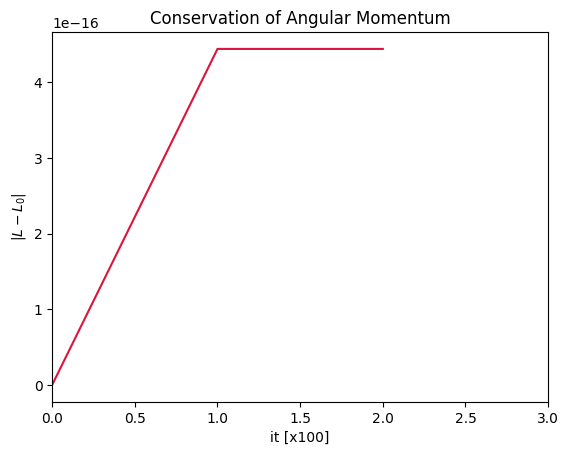

In [8]:
plt.plot(time[:-1], np.abs(ang_mom[:-1]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel("$|L-L_0|$")
plt.xlim(0, T-1)
plt.show()

# Conservation of Energy

In [9]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [10]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

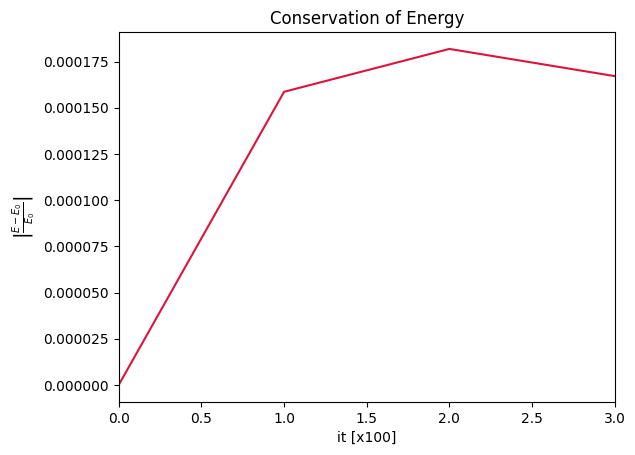

In [11]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

# Density distribution

In [37]:
rad = np.sqrt((sdf["x"]-0.5)**2 + (sdf["y"]-0.5)**2)

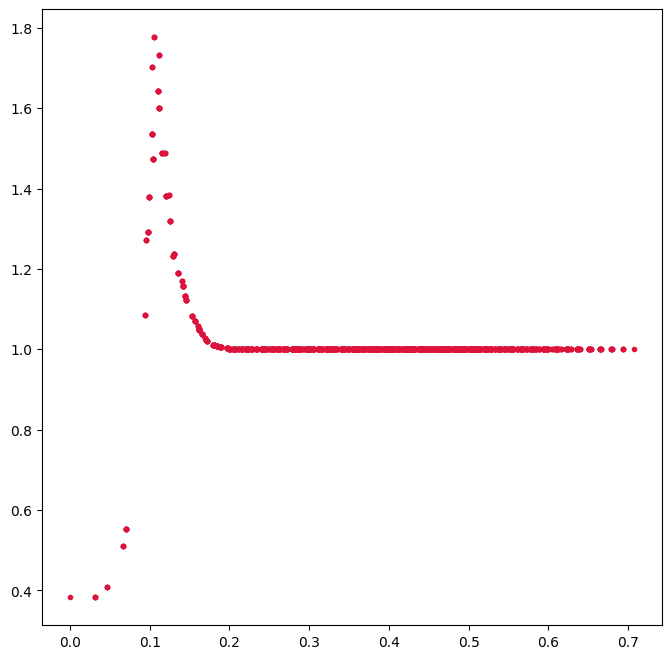

In [38]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, sdf['rho'], ".", color="crimson")
#plt.ylim(0.95,1.02)
plt.show()